## PERCEPTRON MULTICOUCHE

#### IMPORTS

In [1]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import datetime

In [2]:
%load_ext tensorboard
#!rm -rf ./logs/ 

#### DATASET

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


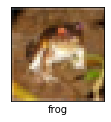

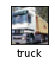

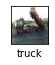

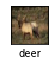

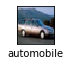

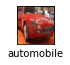

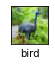

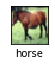

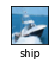

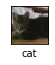

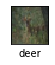

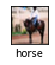

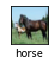

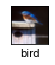

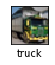

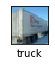

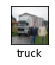

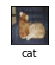

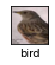

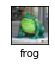

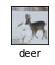

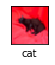

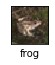

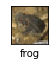

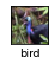

In [4]:
(x_train, y_train), (x_val, y_val) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)
x_train = x_train / 255
x_val = x_val / 255

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
    plt.show()

#### MODEL

In [10]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(200, activation=relu))
    model.add(Dense(200, activation=relu))
    model.add(Dense(10, activation=softmax))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=[sparse_categorical_accuracy])
    return model

#### ENTRAINEMENT

In [11]:
# 1 couche
#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# 2 couche
log_2 = "logs_2/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_2, histogram_freq=1)

model = create_model()
print(model.summary())
model.fit(x_train, y_train, validation_data=(x_val, y_val),
          epochs=1000,
          batch_size=8192,
          callbacks=[tensorboard_callback])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 656,810
Trainable params: 656,810
Non-trainable params: 0
_________________________________________________________________
None
Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
50000/50000 [==============================] - 4s 76us/sample - loss: 2.5986 - sparse_categorical_accuracy: 0.1406 - val_loss: 2.3598 - val_sparse_categorical_accuracy: 0.1697
Ep

50000/50000 [==============================] - 3s 58us/sample - loss: 1.3789 - sparse_categorical_accuracy: 0.5156 - val_loss: 1.4437 - val_sparse_categorical_accuracy: 0.4850
Epoch 83/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 1.3739 - sparse_categorical_accuracy: 0.5172 - val_loss: 1.4561 - val_sparse_categorical_accuracy: 0.4833
Epoch 84/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 1.3804 - sparse_categorical_accuracy: 0.5132 - val_loss: 1.4696 - val_sparse_categorical_accuracy: 0.4798
Epoch 85/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 1.3802 - sparse_categorical_accuracy: 0.5124 - val_loss: 1.4586 - val_sparse_categorical_accuracy: 0.4780
Epoch 86/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 1.3786 - sparse_categorical_accuracy: 0.5127 - val_loss: 1.4306 - val_sparse_categorical_accuracy: 0.4944
Epoch 87/1000
50000/50000 [==============================] - 3s 

50000/50000 [==============================] - 2s 50us/sample - loss: 1.2905 - sparse_categorical_accuracy: 0.5492 - val_loss: 1.3983 - val_sparse_categorical_accuracy: 0.5061
Epoch 126/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 1.2793 - sparse_categorical_accuracy: 0.5513 - val_loss: 1.3893 - val_sparse_categorical_accuracy: 0.5076
Epoch 127/1000
50000/50000 [==============================] - 3s 53us/sample - loss: 1.2753 - sparse_categorical_accuracy: 0.5535 - val_loss: 1.4162 - val_sparse_categorical_accuracy: 0.4965
Epoch 128/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 1.2808 - sparse_categorical_accuracy: 0.5503 - val_loss: 1.3901 - val_sparse_categorical_accuracy: 0.5052
Epoch 129/1000
50000/50000 [==============================] - 3s 57us/sample - loss: 1.2748 - sparse_categorical_accuracy: 0.5537 - val_loss: 1.4103 - val_sparse_categorical_accuracy: 0.5021
Epoch 130/1000
50000/50000 [==============================] 

Epoch 168/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 1.2196 - sparse_categorical_accuracy: 0.5708 - val_loss: 1.4080 - val_sparse_categorical_accuracy: 0.5011
Epoch 169/1000
50000/50000 [==============================] - 3s 58us/sample - loss: 1.2230 - sparse_categorical_accuracy: 0.5715 - val_loss: 1.3978 - val_sparse_categorical_accuracy: 0.5094
Epoch 170/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 1.2319 - sparse_categorical_accuracy: 0.5674 - val_loss: 1.4031 - val_sparse_categorical_accuracy: 0.5061
Epoch 171/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 1.2260 - sparse_categorical_accuracy: 0.5699 - val_loss: 1.4007 - val_sparse_categorical_accuracy: 0.5117
Epoch 172/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 1.2202 - sparse_categorical_accuracy: 0.5707 - val_loss: 1.3777 - val_sparse_categorical_accuracy: 0.5109
Epoch 173/1000
50000/50000 [=================

Epoch 211/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 1.1538 - sparse_categorical_accuracy: 0.5950 - val_loss: 1.3778 - val_sparse_categorical_accuracy: 0.5109
Epoch 212/1000
50000/50000 [==============================] - 3s 53us/sample - loss: 1.1547 - sparse_categorical_accuracy: 0.5943 - val_loss: 1.3670 - val_sparse_categorical_accuracy: 0.5171
Epoch 213/1000
50000/50000 [==============================] - 3s 53us/sample - loss: 1.1482 - sparse_categorical_accuracy: 0.5957 - val_loss: 1.3646 - val_sparse_categorical_accuracy: 0.5199
Epoch 214/1000
50000/50000 [==============================] - 3s 51us/sample - loss: 1.1478 - sparse_categorical_accuracy: 0.5994 - val_loss: 1.3748 - val_sparse_categorical_accuracy: 0.5129
Epoch 215/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 1.1497 - sparse_categorical_accuracy: 0.5973 - val_loss: 1.3841 - val_sparse_categorical_accuracy: 0.5116
Epoch 216/1000
50000/50000 [=================

Epoch 254/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 1.1101 - sparse_categorical_accuracy: 0.6111 - val_loss: 1.3758 - val_sparse_categorical_accuracy: 0.5153
Epoch 255/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 1.1062 - sparse_categorical_accuracy: 0.6123 - val_loss: 1.3748 - val_sparse_categorical_accuracy: 0.5141
Epoch 256/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 1.1040 - sparse_categorical_accuracy: 0.6130 - val_loss: 1.3863 - val_sparse_categorical_accuracy: 0.5145
Epoch 257/1000
50000/50000 [==============================] - 3s 53us/sample - loss: 1.1140 - sparse_categorical_accuracy: 0.6098 - val_loss: 1.3886 - val_sparse_categorical_accuracy: 0.5150
Epoch 258/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 1.1075 - sparse_categorical_accuracy: 0.6102 - val_loss: 1.3908 - val_sparse_categorical_accuracy: 0.5129
Epoch 259/1000
50000/50000 [=================

Epoch 297/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 1.0625 - sparse_categorical_accuracy: 0.6271 - val_loss: 1.3946 - val_sparse_categorical_accuracy: 0.5121
Epoch 298/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 1.0673 - sparse_categorical_accuracy: 0.6250 - val_loss: 1.4011 - val_sparse_categorical_accuracy: 0.5113
Epoch 299/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 1.0704 - sparse_categorical_accuracy: 0.6247 - val_loss: 1.3765 - val_sparse_categorical_accuracy: 0.5159
Epoch 300/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 1.0606 - sparse_categorical_accuracy: 0.6268 - val_loss: 1.3827 - val_sparse_categorical_accuracy: 0.5172
Epoch 301/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 1.0607 - sparse_categorical_accuracy: 0.6272 - val_loss: 1.4061 - val_sparse_categorical_accuracy: 0.5122
Epoch 302/1000
50000/50000 [=================

Epoch 340/1000
50000/50000 [==============================] - 3s 53us/sample - loss: 1.0367 - sparse_categorical_accuracy: 0.6352 - val_loss: 1.4563 - val_sparse_categorical_accuracy: 0.5012
Epoch 341/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 1.0684 - sparse_categorical_accuracy: 0.6251 - val_loss: 1.4359 - val_sparse_categorical_accuracy: 0.5023
Epoch 342/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 1.0545 - sparse_categorical_accuracy: 0.6271 - val_loss: 1.4110 - val_sparse_categorical_accuracy: 0.5089
Epoch 343/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 1.0439 - sparse_categorical_accuracy: 0.6341 - val_loss: 1.4062 - val_sparse_categorical_accuracy: 0.5138
Epoch 344/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 1.0335 - sparse_categorical_accuracy: 0.6376 - val_loss: 1.3962 - val_sparse_categorical_accuracy: 0.5140
Epoch 345/1000
50000/50000 [=================

Epoch 383/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 1.0055 - sparse_categorical_accuracy: 0.6460 - val_loss: 1.4590 - val_sparse_categorical_accuracy: 0.4974
Epoch 384/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 1.0215 - sparse_categorical_accuracy: 0.6408 - val_loss: 1.4199 - val_sparse_categorical_accuracy: 0.5110
Epoch 385/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 1.0091 - sparse_categorical_accuracy: 0.6444 - val_loss: 1.4297 - val_sparse_categorical_accuracy: 0.5059
Epoch 386/1000
50000/50000 [==============================] - 3s 53us/sample - loss: 1.0023 - sparse_categorical_accuracy: 0.6506 - val_loss: 1.4155 - val_sparse_categorical_accuracy: 0.5160
Epoch 387/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 0.9944 - sparse_categorical_accuracy: 0.6518 - val_loss: 1.4274 - val_sparse_categorical_accuracy: 0.5090
Epoch 388/1000
50000/50000 [=================

Epoch 426/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 0.9587 - sparse_categorical_accuracy: 0.6659 - val_loss: 1.4581 - val_sparse_categorical_accuracy: 0.5069
Epoch 427/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 0.9788 - sparse_categorical_accuracy: 0.6571 - val_loss: 1.4357 - val_sparse_categorical_accuracy: 0.5079
Epoch 428/1000
50000/50000 [==============================] - 3s 53us/sample - loss: 0.9685 - sparse_categorical_accuracy: 0.6602 - val_loss: 1.4329 - val_sparse_categorical_accuracy: 0.5130
Epoch 429/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 0.9674 - sparse_categorical_accuracy: 0.6607 - val_loss: 1.4597 - val_sparse_categorical_accuracy: 0.5047
Epoch 430/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 0.9725 - sparse_categorical_accuracy: 0.6591 - val_loss: 1.4314 - val_sparse_categorical_accuracy: 0.5085
Epoch 431/1000
50000/50000 [=================

Epoch 469/1000
50000/50000 [==============================] - 3s 53us/sample - loss: 0.9410 - sparse_categorical_accuracy: 0.6726 - val_loss: 1.4551 - val_sparse_categorical_accuracy: 0.5108
Epoch 470/1000
50000/50000 [==============================] - 3s 57us/sample - loss: 0.9393 - sparse_categorical_accuracy: 0.6724 - val_loss: 1.4401 - val_sparse_categorical_accuracy: 0.5076
Epoch 471/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 0.9266 - sparse_categorical_accuracy: 0.6771 - val_loss: 1.4725 - val_sparse_categorical_accuracy: 0.5084
Epoch 472/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 0.9524 - sparse_categorical_accuracy: 0.6688 - val_loss: 1.4620 - val_sparse_categorical_accuracy: 0.4967
Epoch 473/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 0.9472 - sparse_categorical_accuracy: 0.6687 - val_loss: 1.4953 - val_sparse_categorical_accuracy: 0.4927
Epoch 474/1000
50000/50000 [=================

Epoch 512/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 0.9225 - sparse_categorical_accuracy: 0.6795 - val_loss: 1.4869 - val_sparse_categorical_accuracy: 0.5053
Epoch 513/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 0.9334 - sparse_categorical_accuracy: 0.6720 - val_loss: 1.4507 - val_sparse_categorical_accuracy: 0.5103
Epoch 514/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 0.9224 - sparse_categorical_accuracy: 0.6780 - val_loss: 1.4614 - val_sparse_categorical_accuracy: 0.5128
Epoch 515/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 0.9148 - sparse_categorical_accuracy: 0.6814 - val_loss: 1.4737 - val_sparse_categorical_accuracy: 0.5086
Epoch 516/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 0.9152 - sparse_categorical_accuracy: 0.6809 - val_loss: 1.4664 - val_sparse_categorical_accuracy: 0.5106
Epoch 517/1000
50000/50000 [=================

Epoch 555/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 0.9083 - sparse_categorical_accuracy: 0.6829 - val_loss: 1.5183 - val_sparse_categorical_accuracy: 0.4976
Epoch 556/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 0.9004 - sparse_categorical_accuracy: 0.6865 - val_loss: 1.4829 - val_sparse_categorical_accuracy: 0.5076
Epoch 557/1000
50000/50000 [==============================] - 3s 62us/sample - loss: 0.8919 - sparse_categorical_accuracy: 0.6880 - val_loss: 1.5260 - val_sparse_categorical_accuracy: 0.4993
Epoch 558/1000
50000/50000 [==============================] - 3s 58us/sample - loss: 0.9059 - sparse_categorical_accuracy: 0.6839 - val_loss: 1.4859 - val_sparse_categorical_accuracy: 0.5082
Epoch 559/1000
50000/50000 [==============================] - 3s 57us/sample - loss: 0.8839 - sparse_categorical_accuracy: 0.6929 - val_loss: 1.4831 - val_sparse_categorical_accuracy: 0.5050
Epoch 560/1000
50000/50000 [=================

Epoch 598/1000
50000/50000 [==============================] - 3s 57us/sample - loss: 0.8620 - sparse_categorical_accuracy: 0.6992 - val_loss: 1.5200 - val_sparse_categorical_accuracy: 0.5074
Epoch 599/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 0.8722 - sparse_categorical_accuracy: 0.6960 - val_loss: 1.5111 - val_sparse_categorical_accuracy: 0.5033
Epoch 600/1000
50000/50000 [==============================] - 3s 64us/sample - loss: 0.8621 - sparse_categorical_accuracy: 0.7026 - val_loss: 1.5237 - val_sparse_categorical_accuracy: 0.5040
Epoch 601/1000
50000/50000 [==============================] - 3s 61us/sample - loss: 0.8680 - sparse_categorical_accuracy: 0.6982 - val_loss: 1.5473 - val_sparse_categorical_accuracy: 0.5046
Epoch 602/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 0.8889 - sparse_categorical_accuracy: 0.6901 - val_loss: 1.5608 - val_sparse_categorical_accuracy: 0.4934
Epoch 603/1000
50000/50000 [=================

Epoch 641/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 0.9114 - sparse_categorical_accuracy: 0.6806 - val_loss: 1.5370 - val_sparse_categorical_accuracy: 0.5027
Epoch 642/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 0.8678 - sparse_categorical_accuracy: 0.6976 - val_loss: 1.5131 - val_sparse_categorical_accuracy: 0.5096
Epoch 643/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 0.8449 - sparse_categorical_accuracy: 0.7059 - val_loss: 1.5452 - val_sparse_categorical_accuracy: 0.5007
Epoch 644/1000
50000/50000 [==============================] - 3s 65us/sample - loss: 0.8540 - sparse_categorical_accuracy: 0.7019 - val_loss: 1.5457 - val_sparse_categorical_accuracy: 0.4991
Epoch 645/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 0.8562 - sparse_categorical_accuracy: 0.7039 - val_loss: 1.5587 - val_sparse_categorical_accuracy: 0.4960
Epoch 646/1000
50000/50000 [=================

Epoch 684/1000
50000/50000 [==============================] - 3s 64us/sample - loss: 0.8216 - sparse_categorical_accuracy: 0.7160 - val_loss: 1.5744 - val_sparse_categorical_accuracy: 0.5057
Epoch 685/1000
50000/50000 [==============================] - 3s 59us/sample - loss: 0.8269 - sparse_categorical_accuracy: 0.7143 - val_loss: 1.5502 - val_sparse_categorical_accuracy: 0.5089
Epoch 686/1000
50000/50000 [==============================] - 3s 63us/sample - loss: 0.8188 - sparse_categorical_accuracy: 0.7172 - val_loss: 1.5702 - val_sparse_categorical_accuracy: 0.5025
Epoch 687/1000
50000/50000 [==============================] - 3s 59us/sample - loss: 0.8211 - sparse_categorical_accuracy: 0.7162 - val_loss: 1.5770 - val_sparse_categorical_accuracy: 0.4966
Epoch 688/1000
50000/50000 [==============================] - 3s 60us/sample - loss: 0.8231 - sparse_categorical_accuracy: 0.7161 - val_loss: 1.5783 - val_sparse_categorical_accuracy: 0.4989
Epoch 689/1000
50000/50000 [=================

Epoch 727/1000
50000/50000 [==============================] - 3s 57us/sample - loss: 0.8059 - sparse_categorical_accuracy: 0.7227 - val_loss: 1.5918 - val_sparse_categorical_accuracy: 0.5002
Epoch 728/1000
50000/50000 [==============================] - 3s 59us/sample - loss: 0.8046 - sparse_categorical_accuracy: 0.7219 - val_loss: 1.6065 - val_sparse_categorical_accuracy: 0.4929
Epoch 729/1000
50000/50000 [==============================] - 3s 60us/sample - loss: 0.8118 - sparse_categorical_accuracy: 0.7179 - val_loss: 1.5904 - val_sparse_categorical_accuracy: 0.5074
Epoch 730/1000
50000/50000 [==============================] - 3s 53us/sample - loss: 0.8051 - sparse_categorical_accuracy: 0.7212 - val_loss: 1.5802 - val_sparse_categorical_accuracy: 0.5044
Epoch 731/1000
50000/50000 [==============================] - 3s 60us/sample - loss: 0.7947 - sparse_categorical_accuracy: 0.7263 - val_loss: 1.5901 - val_sparse_categorical_accuracy: 0.5022
Epoch 732/1000
50000/50000 [=================

Epoch 770/1000
50000/50000 [==============================] - 3s 61us/sample - loss: 0.7887 - sparse_categorical_accuracy: 0.7283 - val_loss: 1.6050 - val_sparse_categorical_accuracy: 0.5044
Epoch 771/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 0.7748 - sparse_categorical_accuracy: 0.7348 - val_loss: 1.5943 - val_sparse_categorical_accuracy: 0.5055
Epoch 772/1000
50000/50000 [==============================] - 3s 57us/sample - loss: 0.7734 - sparse_categorical_accuracy: 0.7346 - val_loss: 1.5818 - val_sparse_categorical_accuracy: 0.5092
Epoch 773/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 0.7679 - sparse_categorical_accuracy: 0.7383 - val_loss: 1.6093 - val_sparse_categorical_accuracy: 0.5080
Epoch 774/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 0.7811 - sparse_categorical_accuracy: 0.7330 - val_loss: 1.6293 - val_sparse_categorical_accuracy: 0.5031
Epoch 775/1000
50000/50000 [=================

Epoch 813/1000
50000/50000 [==============================] - 3s 58us/sample - loss: 0.7659 - sparse_categorical_accuracy: 0.7352 - val_loss: 1.6081 - val_sparse_categorical_accuracy: 0.5068
Epoch 814/1000
50000/50000 [==============================] - 3s 57us/sample - loss: 0.7579 - sparse_categorical_accuracy: 0.7427 - val_loss: 1.6717 - val_sparse_categorical_accuracy: 0.5002
Epoch 815/1000
50000/50000 [==============================] - 3s 57us/sample - loss: 0.7880 - sparse_categorical_accuracy: 0.7276 - val_loss: 1.6364 - val_sparse_categorical_accuracy: 0.5048
Epoch 816/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 0.7713 - sparse_categorical_accuracy: 0.7352 - val_loss: 1.6193 - val_sparse_categorical_accuracy: 0.5009
Epoch 817/1000
50000/50000 [==============================] - 3s 64us/sample - loss: 0.7580 - sparse_categorical_accuracy: 0.7397 - val_loss: 1.6338 - val_sparse_categorical_accuracy: 0.4985
Epoch 818/1000
50000/50000 [=================

Epoch 856/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 0.7485 - sparse_categorical_accuracy: 0.7447 - val_loss: 1.6412 - val_sparse_categorical_accuracy: 0.5024
Epoch 857/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 0.7424 - sparse_categorical_accuracy: 0.7470 - val_loss: 1.6819 - val_sparse_categorical_accuracy: 0.5001
Epoch 858/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 0.7585 - sparse_categorical_accuracy: 0.7375 - val_loss: 1.6621 - val_sparse_categorical_accuracy: 0.4954
Epoch 859/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 0.7471 - sparse_categorical_accuracy: 0.7420 - val_loss: 1.6621 - val_sparse_categorical_accuracy: 0.4974
Epoch 860/1000
50000/50000 [==============================] - 3s 62us/sample - loss: 0.7407 - sparse_categorical_accuracy: 0.7477 - val_loss: 1.6744 - val_sparse_categorical_accuracy: 0.4947
Epoch 861/1000
50000/50000 [=================

Epoch 899/1000
50000/50000 [==============================] - 3s 61us/sample - loss: 0.7487 - sparse_categorical_accuracy: 0.7420 - val_loss: 1.7647 - val_sparse_categorical_accuracy: 0.4866
Epoch 900/1000
50000/50000 [==============================] - 3s 57us/sample - loss: 0.7817 - sparse_categorical_accuracy: 0.7279 - val_loss: 1.7492 - val_sparse_categorical_accuracy: 0.4895
Epoch 901/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 0.7718 - sparse_categorical_accuracy: 0.7325 - val_loss: 1.6645 - val_sparse_categorical_accuracy: 0.5043
Epoch 902/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 0.7392 - sparse_categorical_accuracy: 0.7464 - val_loss: 1.7117 - val_sparse_categorical_accuracy: 0.4937
Epoch 903/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 0.7531 - sparse_categorical_accuracy: 0.7397 - val_loss: 1.6903 - val_sparse_categorical_accuracy: 0.4981
Epoch 904/1000
50000/50000 [=================

Epoch 942/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 0.7231 - sparse_categorical_accuracy: 0.7519 - val_loss: 1.7176 - val_sparse_categorical_accuracy: 0.4975
Epoch 943/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 0.7245 - sparse_categorical_accuracy: 0.7519 - val_loss: 1.7254 - val_sparse_categorical_accuracy: 0.4991
Epoch 944/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 0.7223 - sparse_categorical_accuracy: 0.7536 - val_loss: 1.7247 - val_sparse_categorical_accuracy: 0.4991
Epoch 945/1000
50000/50000 [==============================] - 3s 58us/sample - loss: 0.7184 - sparse_categorical_accuracy: 0.7530 - val_loss: 1.7242 - val_sparse_categorical_accuracy: 0.4996
Epoch 946/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 0.7311 - sparse_categorical_accuracy: 0.7487 - val_loss: 1.7312 - val_sparse_categorical_accuracy: 0.4935
Epoch 947/1000
50000/50000 [=================

Epoch 985/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 0.6856 - sparse_categorical_accuracy: 0.7674 - val_loss: 1.7245 - val_sparse_categorical_accuracy: 0.5035
Epoch 986/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 0.6831 - sparse_categorical_accuracy: 0.7694 - val_loss: 1.7233 - val_sparse_categorical_accuracy: 0.5000
Epoch 987/1000
50000/50000 [==============================] - 3s 57us/sample - loss: 0.6955 - sparse_categorical_accuracy: 0.7635 - val_loss: 1.7531 - val_sparse_categorical_accuracy: 0.4920
Epoch 988/1000
50000/50000 [==============================] - 3s 58us/sample - loss: 0.7080 - sparse_categorical_accuracy: 0.7557 - val_loss: 1.7472 - val_sparse_categorical_accuracy: 0.4965
Epoch 989/1000
50000/50000 [==============================] - 3s 59us/sample - loss: 0.7116 - sparse_categorical_accuracy: 0.7543 - val_loss: 1.7706 - val_sparse_categorical_accuracy: 0.4928
Epoch 990/1000
50000/50000 [=================

In [9]:
#%tensorboard --logdir logs/fit
%tensorboard --logdir logs_2/fit

Reusing TensorBoard on port 6007 (pid 2091), started 0:42:41 ago. (Use '!kill 2091' to kill it.)